In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1

## 1.1

Для начала определим какой оптимальный стартовый размер динимамического массива нужно брать, для этого мы рассмотрели следующие варианты: 10, 100, 1000, 5000, 10000, 50000. Далее мы провели тест с политикой реаллокации "увеличение размера на изначальную длину". То есть, к примеру, мы, выбрав параметр 1000, массив при расширении увеличиваем на тысячу.

In [2]:
task_1_1_result = np.array([1.23133, 1.276, 1.24667,  0.279, 0.145333, 0.038]) * 1000
sizes = ["10", "100", "1000", "5000", "10000", "50000"]
add_factors = ["1000", "5000", "10000", "50000", "75000", "100000"]
multiply_factors = ["9/8", "4/3", "3/2", "8/5", "2", "9/4", "10/4"]

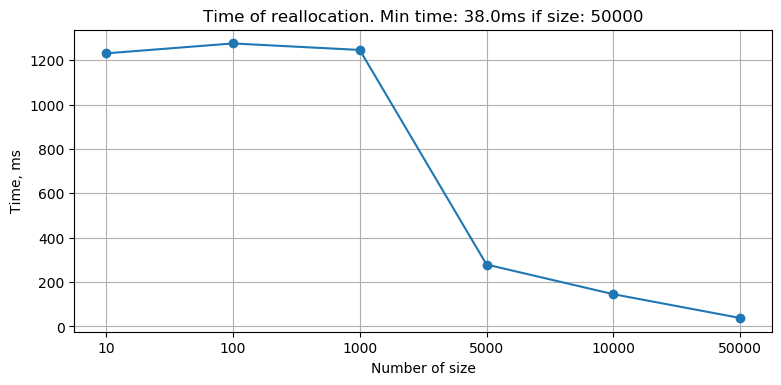

In [22]:
min_index = np.where(task_1_1_result == min(task_1_1_result))[0][0]
fig, axes = plt.subplots(figsize=(9,4),dpi=100)
axes.plot(sizes, task_1_1_result, marker = "o")

axes.set(xlabel='Number of size', ylabel='Time, ms',
       title="Time of reallocation. Min time: {}ms if size: {}".format(min(task_1_1_result), sizes[min_index]))
axes.grid()


Здесь видно, что у нас с увеличением количества изначального размера скорость работы динамического массива увеличивалось, поэтому резонно было выбрать начальный размер 50000

## 1.2

Далее нам нужно выяснить, что эффективнее: увеличивать НА константу или увеличивать В константу размер массива

### 1.2.1

Проведём те же тесты, увеличивая массив НА константы: 1000, 5000, 10000, 50000, 75000, 100000 

In [23]:
task_1_2_1_result = np.array([
        [1.17967, 0.227, 0.118667, 0.031, 0.0253333, 0.0203333],
        [1.09433, 0.233, 0.123, 0.031, 0.027, 0.0196667],
        [1.10167, 0.233667, 0.122333, 0.031, 0.0256667, 0.02],
        [1.07, 0.227, 0.117, 0.0303333, 0.0246667, 0.02],
        [1.062, 0.225, 0.117333, 0.031, 0.026, 0.0193333],
        [1.07567, 0.229333, 0.118, 0.0306667, 0.025, 0.021]
        ])*1000

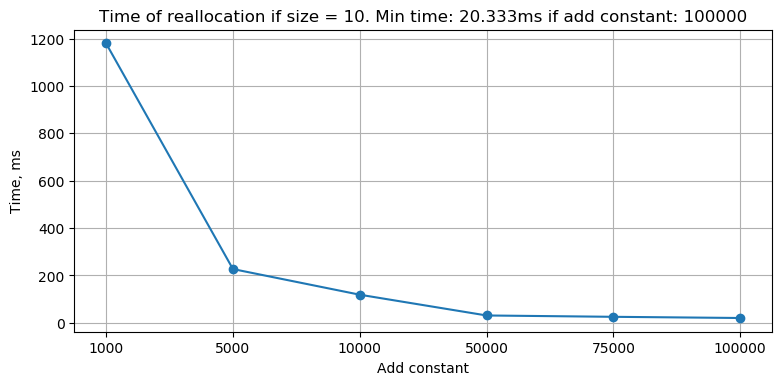

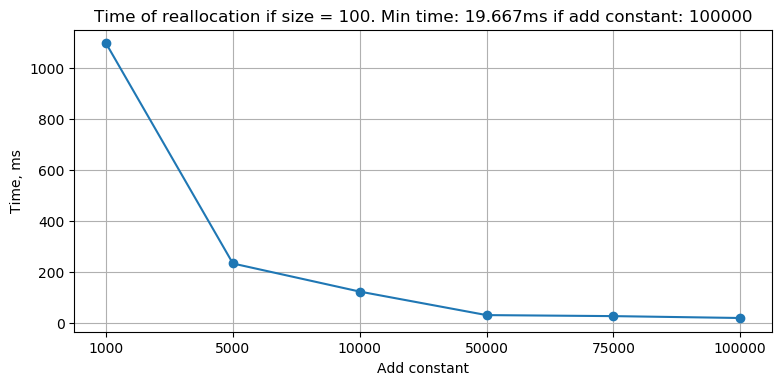

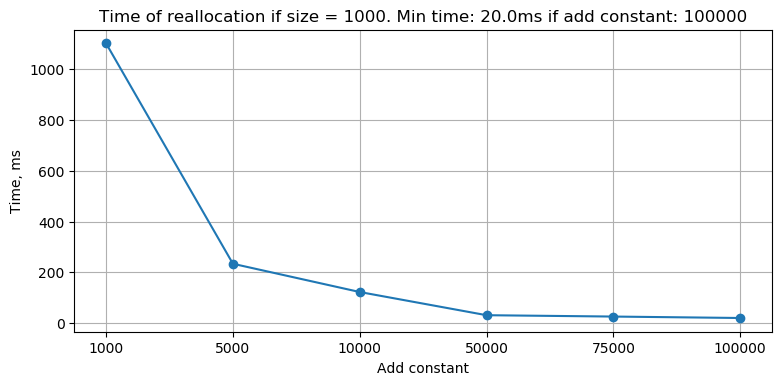

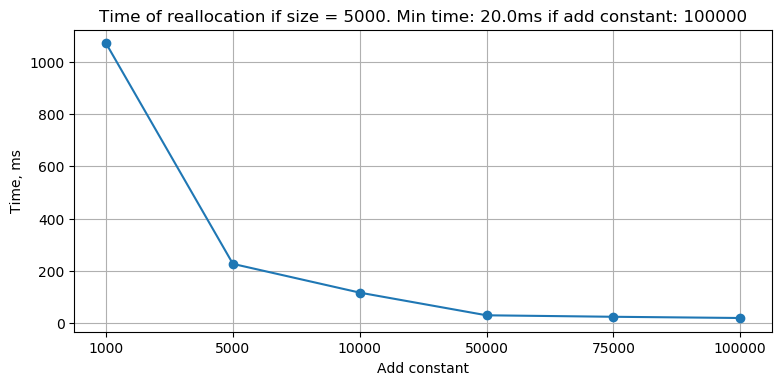

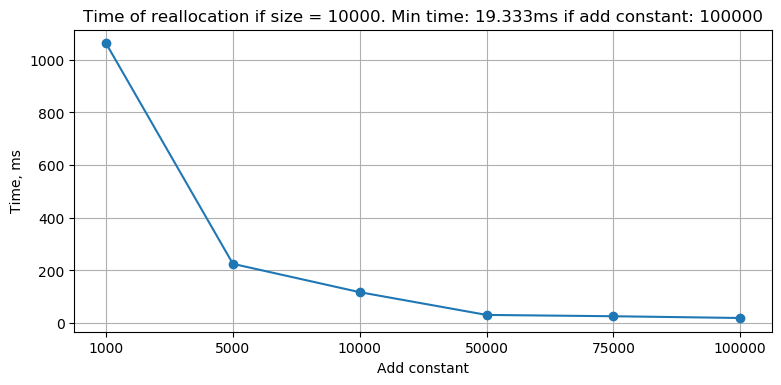

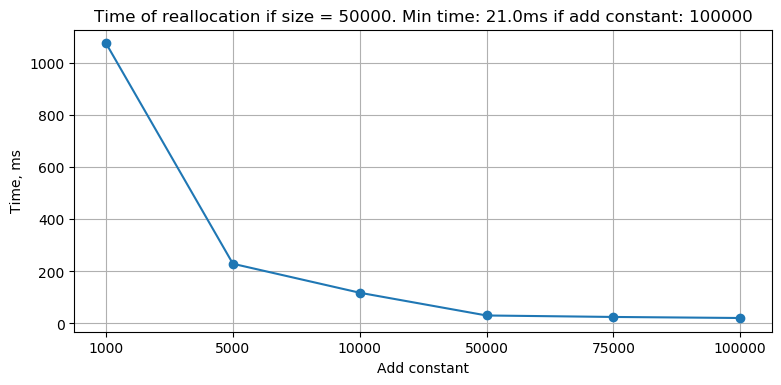

In [24]:
for i in range(6):
    min_index_1 = np.where(task_1_2_1_result[i] == min(task_1_2_1_result[i]))[0][0]
    
    fig, axes = plt.subplots(figsize=(9,4),dpi=100)
    axes.plot(add_factors, task_1_2_1_result[i], marker = "o")

    axes.set(xlabel='Add constant', ylabel='Time, ms',
       title='Time of reallocation if size = {}. Min time: {}ms if add constant: {}'.format(sizes[i], round(min(task_1_2_1_result[i]), 3), add_factors[min_index_1]))
    axes.grid()


Можно видеть из результатов, что в среднем эффективнее всего в случае увеличения на константу увеличивать на 100000. 
В таком случае время равно примерно 20 мс

### 1.2.2

Рассмотрим теперь увеличение В константу раз текущий размер массива. Константы будем брать следущие: 9/8, 4/3, 3/2, 8/5, 2, 9/4, 10/4

In [25]:
task_1_2_2_result = np.array([
        [0.0136667, 0.015, 0.0153333, 0.0136667, 0.0136667, 0.0156667, 0.0146667],
        [0.0143333, 0.015, 0.016, 0.016, 0.0196667, 0.0206667, 0.0173333],
        [0.0163333, 0.0116667, 0.0146667, 0.0143333, 0.0166667, 0.0143333, 0.0146667],
        [0.0156667, 0.015, 0.0153333, 0.0173333, 0.0116667, 0.0123333, 0.0143333],
        [0.0173333, 0.014, 0.02, 0.0506667, 0.0213333, 0.0156667, 0.0153333],
        [0.0156667, 0.0156667, 0.0153333, 0.015, 0.0123333, 0.0126667, 0.0126667]
        ]) * 1000

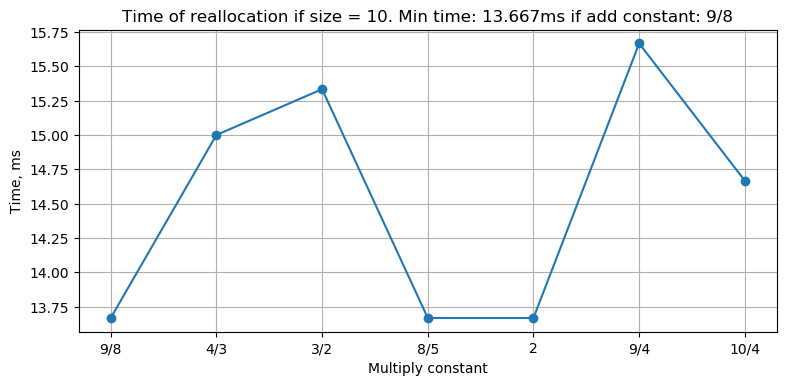

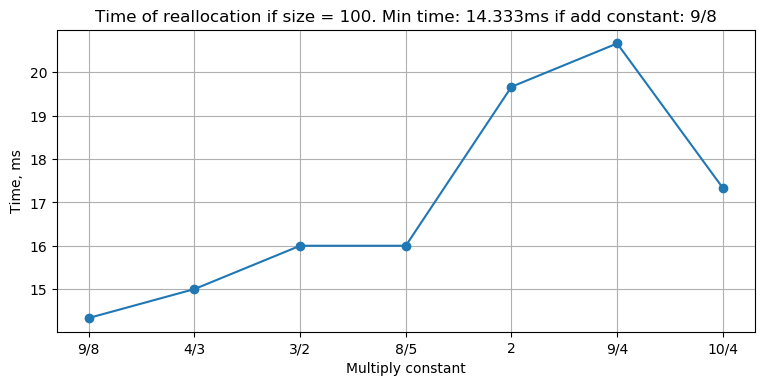

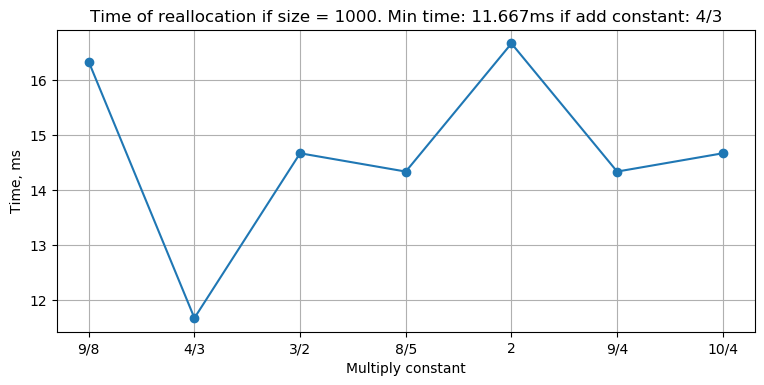

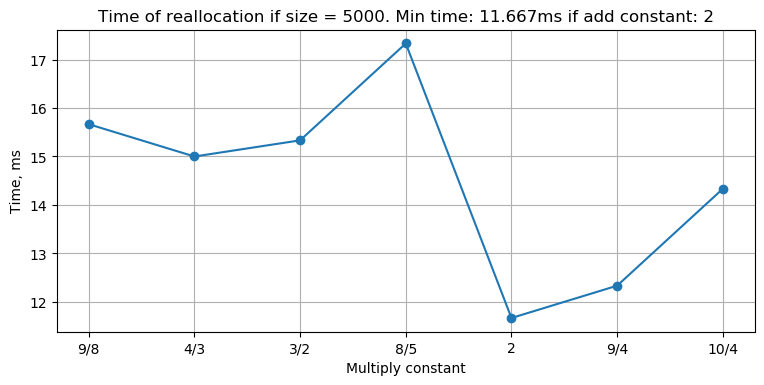

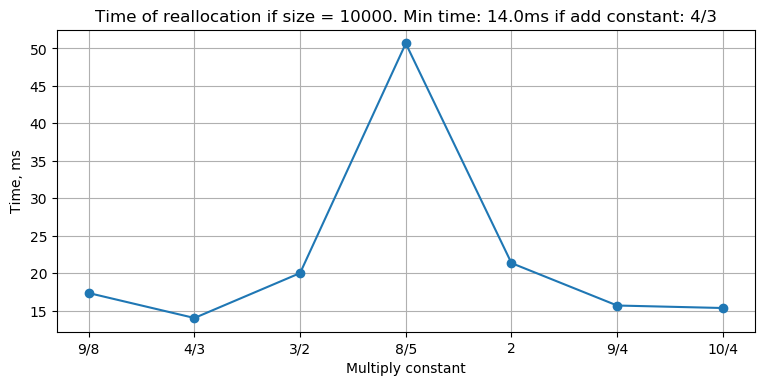

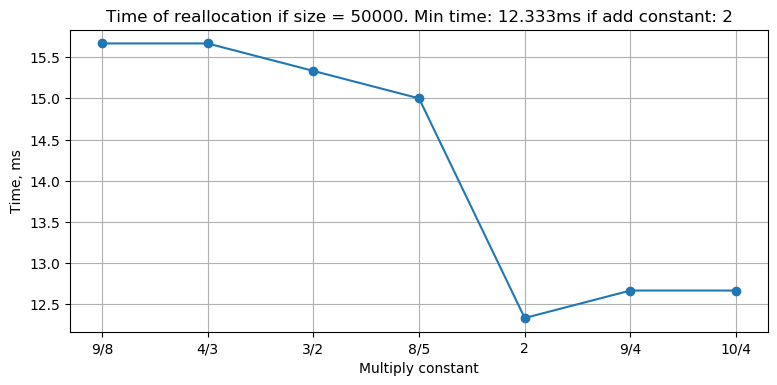

In [26]:
for i in range(6):
    min_index_2 = np.where(task_1_2_2_result[i] == min(task_1_2_2_result[i]))[0][0]
    
    fig, axes = plt.subplots(figsize=(9,4),dpi=100)
    axes.plot(multiply_factors, task_1_2_2_result[i], marker = "o")

    axes.set(xlabel='Multiply constant', ylabel='Time, ms',
       title='Time of reallocation if size = {}. Min time: {}ms if add constant: {}'.format(sizes[i], round(min(task_1_2_2_result[i]), 3), multiply_factors[min_index_2]))
    axes.grid()


Усредняя результаты, сравнивая их друг с другом и учитывая, что выбранный оптимальный размер у нас это 50000 элементов, мы приходим к выводу, что увеличивать В константу эффективнее всего, если за константу брать 2. При этом если сравнивать затраченное время, становится понятно, что увеличивать В константу намного эффективнее, чем увеличивать НА константу текущий размер массива.

Итого приходим к выводу, что в динамическом массиве лучше всего брать начальный размер 50000, а реаллоцировать память надо в 2 раза больше текущей.

# 2

Нам нужно выяснить, на какой реализации стек работает быстрее всего: на основе динамического массива или на основе односвязного списка.

## 2.1

Смоделируем стек вызова функций. Мы пушим $10^6$ интов, потом удаляем половину элементов и пушим четверть - остаётся 750000 интов. Повторяем удаление половины и вставку четверти, пока не остаётся в стеке меньше 100000 элементов (получается 9 итераций).

In [27]:
task_2_1_array_based_result = 0.033 * 1000;
task_2_1_list_based_relult = 0.665667 * 1000;

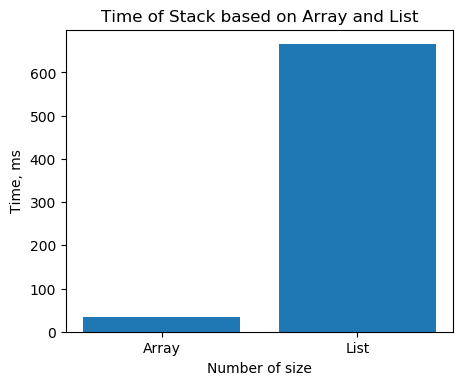

In [43]:
fig, axes = plt.subplots(figsize=(5,4),dpi=100)
axes.bar(["Array", "List"], [task_2_1_array_based_result, task_2_1_list_based_relult])

axes.set(xlabel='Number of size', ylabel='Time, ms',
       title="Time of Stack based on Array and List")
axes.grid(b = False)


Удивительно, но стек на динамическом массиве работает в разы быстрее, чем на односвязном списке.

## 2.2

Cмоделируем нагруженный стек вызовов функций. Мы пушим $10^6$ интов, потом 100 раз удаляем и добавляем 10000 элементов. Далее как в первом тесте проводим 9 итераций удаления-вставки и снова 100 раз удалиляем и добавляем 10000 элементов.

In [29]:
task_2_2_array_based_result = 0.0563333 * 1000;
task_2_2_list_based_relult = 1.88033 * 1000;

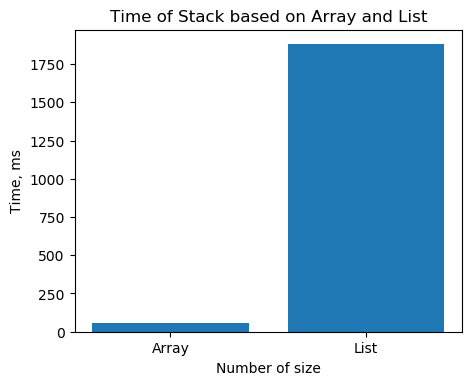

In [42]:
fig, axes = plt.subplots(figsize=(5,4),dpi=100)
axes.bar(["Array", "List"], [task_2_2_array_based_result, task_2_2_list_based_relult])

axes.set(xlabel='Number of size', ylabel='Time, ms',
       title="Time of Stack based on Array and List")
axes.grid(b = False)


Поразательно, но стек на динамическом массиве работает в разы быстрее, чем на односвязном списке.

## 2.3

Смоделируем случайную последовательность команд. Мы средствами языка генерируем случайные числа из множества {1,2}. Далее сначала доводим размер стека до миллиона, а потом выполняем миллион инструкций следующего вида: каждое выпадение единицы добавляем элемент, а на двойку - удаляем элемент из стека. 

In [31]:
task_2_3_array_based_relult = 0.106 * 1000;
task_2_3_list_based_relult = 0.281 * 1000;

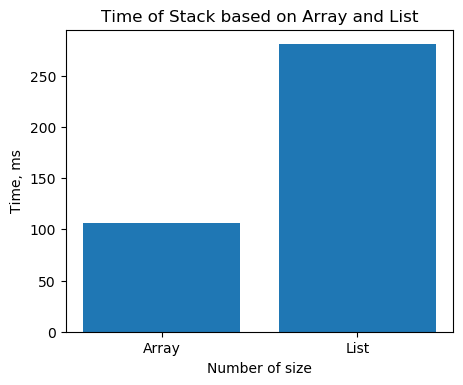

In [41]:
fig, axes = plt.subplots(figsize=(5,4),dpi=100)
axes.bar(["Array", "List"], [task_2_3_array_based_relult, task_2_3_list_based_relult])

axes.set(xlabel='Number of size', ylabel='Time, ms',
       title="Time of Stack based on Array and List")
axes.grid(b = False)
#fig.savefig("D:workspace/2_3.png")

Невероятно, но стек на динамическом массиве работает в разы быстрее, чем на односвязном списке.

# Вывод

Прибегая к правилу "жертвование память в угоду скорости", мы можем сделать вывод, что стек, основанный на динамическом массиве, работает в разы эффективнее, чем на односвязном списке, поэтому лучше использовать стек на динамическом массиве.